<a href="https://colab.research.google.com/github/Aleksandr62aa/AI_ML_DL/blob/main/CNN_Tensorflow_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classifying images using TensorFlow**

**Importing libraries**

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import torch

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Fixed seed
np.random.seed(3)

In [2]:
# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
#  download the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
print(dataset_dir)
dataset_dir = pathlib.Path(dataset_dir).with_suffix('')
print(dataset_dir)


/root/.keras/datasets/flower_photos.tar
/root/.keras/datasets/flower_photos


In [4]:
image_count = len(list(dataset_dir.glob("*/*.jpg")))
print(f"Total images:{image_count}")

Total images:3670


**Train Val dataset**

In [5]:
batch_size = 32
img_width = 180
img_height = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size = batch_size)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

# cache
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
# creat model
num_classes=len(class_names)
model =Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # augmentation
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.2),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # regularization
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [7]:
# compile the model
model.compile(
   optimizer='adam',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
   metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 180, 180, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 random_contrast (RandomCon  (None, 180, 180, 3)       0         
 trast)                                                          
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      4

In [8]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
92/92 [==============================] - 19s 49ms/step - loss: 1.3081 - accuracy: 0.4397 - val_loss: 1.2040 - val_accuracy: 0.4918
Epoch 2/10
92/92 [==============================] - 3s 32ms/step - loss: 1.0606 - accuracy: 0.5715 - val_loss: 0.9897 - val_accuracy: 0.6022
Epoch 3/10
92/92 [==============================] - 3s 31ms/step - loss: 0.9707 - accuracy: 0.6182 - val_loss: 0.9464 - val_accuracy: 0.6362
Epoch 4/10
92/92 [==============================] - 3s 30ms/step - loss: 0.9184 - accuracy: 0.6376 - val_loss: 0.8725 - val_accuracy: 0.6621
Epoch 5/10
92/92 [==============================] - 3s 30ms/step - loss: 0.8633 - accuracy: 0.6645 - val_loss: 0.9473 - val_accuracy: 0.6281
Epoch 6/10
92/92 [==============================] - 3s 32ms/step - loss: 0.8074 - accuracy: 0.6884 - val_loss: 0.8493 - val_accuracy: 0.6744
Epoch 7/10
92/92 [==============================] - 3s 32ms/step - loss: 0.7866 - accuracy: 0.7010 - val_loss: 0.7967 - val_accuracy: 0.6785
Epoch 8/10
9

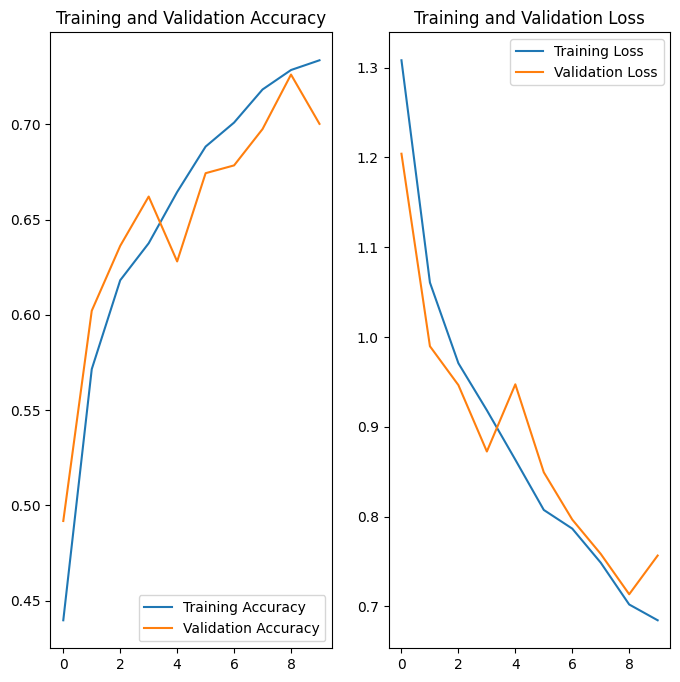

In [9]:
# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
# save the model
model.save_weights('my_flowers_model')
print("Model saved!")

Model saved!


In [11]:
# creat model
num_classes=len(class_names)
model =Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # augmentation
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.2),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # regularization
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [12]:
# compile the model
model.compile(
   optimizer='adam',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
   metrics=['accuracy'])

In [13]:
# load the model
model.load_weights('my_flowers_model')

# evaluate the model
loss, acc = model.evaluate(train_ds, verbose=2)
print("Retored model, accuraccy: {:5.2f}%".format(100*acc))

# load image
img = tf.keras.utils.load_img("test-image.jpg", target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print inference result
print("Most likely in the image {} ({:.2f}% probability)".format(
    class_names[np.argmax(score)],
    100 *np.max(score)))


92/92 - 1s - loss: 0.6117 - accuracy: 0.7677 - 1s/epoch - 15ms/step
Retored model, accuraccy: 76.77%
1/1 [==============================] - 0s 251ms/step
Most likely in the image sunflowers (99.64% probability)


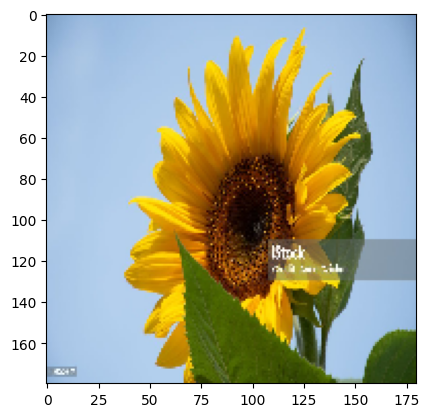

In [14]:
plt.imshow(img)

**Exporting a model file to your computer**

In [15]:
from google.colab import files

model_file_name = 'my_flowers_model.keras'
model.save(model_file_name)
files.download(model_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>